In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from pandas_profiling import ProfileReport

# classes for special types
from pandas.api.types import CategoricalDtype

# Apply the default theme
sns.set_theme()

In [2]:
%matplotlib inline
# should enable plotting without explicit call .show()

%load_ext pretty_jupyter

# Data Understanding

## Motivation

> **Toxicomania** is by definition of WHO the state of periodic or chronic intoxication harming either the individual or society caused by the repeated usage of drugs of either natural or synthetic origin. One of the characteristic signs is the desire to use a drug, acquire it by any means necessary, tendency to raise dosage and psychological or physical addiction.

We analyse a portion of Geodata to find out how drug related crimes is related to information about the demographic in Czech Republic.

## Data Overview

We will work with data from two files.

The file ``geodata/kriminalita/kriminalita_obce.csv`` provides data about the criminality in individual municipalities and the file ``geodata/census11_21/data_obce_vyhl_nevyhl.csv`` provides information from the census in years 2011 and 2021 at the level of municipalities.

In [3]:
# Reading and inspecting data
census = pd.read_csv("geodata/census11_21/data_obce_vyhl_nevyhl.csv")
census.head(10)

,deti_0_2021,deti_1_2021,deti_2_2021,deti_3_2021,deti_4_2021,deti_5_vice_2021,deti_nezj_2021,domy_mat_drevo_2021,domy_mat_kamen_cihly_2021,domy_mat_nep_cihly_2021,...,domy_obd_1919_vyhl_2021,rod_stav_rozv_vyhl_mean,vzdelani_zakl_vyhl_mean,rod_stav_zen_vdana_vyhl_mean,vzdelani_str_np_vyhl_mean,vzdelani_vys_vyhl_mean,vira_ateisti_vyhl_mean,vek_80_inf_vyhl_mean,domy_vlast_obec_stat_vyhl_mean,domy_vlast_fyz_vyhl_mean
0,0.194969,0.143396,0.488050,0.137107,0.021384,0.003774,0.011321,0.014563,0.747573,0.033981,...,0.050933,0.079269,0.159838,0.469874,0.301549,0.136773,0.252840,0.046476,0.007826,0.933068
1,0.182711,0.133595,0.469548,0.157171,0.025540,0.013752,0.017682,0.029255,0.832447,0.005319,...,0.124698,0.110360,0.214232,0.427795,0.264118,0.067960,0.421514,0.048938,0.012675,0.885312
2,0.176471,0.130560,0.486370,0.157819,0.024390,0.014347,0.010043,0.021583,0.839928,0.014388,...,0.090220,0.072670,0.150376,0.467355,0.293469,0.113221,0.348422,0.039416,0.007133,0.949413
3,0.202192,0.114495,0.455542,0.154689,0.043849,0.015834,0.013398,0.052381,0.838095,0.000000,...,0.032733,0.074615,0.147057,0.435202,0.306871,0.114566,0.281049,0.033192,0.007011,0.960576
4,0.190068,0.163527,0.511130,0.106164,0.009418,0.005993,0.013699,0.017104,0.873432,0.010262,...,0.029247,0.072489,0.140181,0.500485,0.298707,0.238190,0.384335,0.041478,0.003325,0.974288
5,0.271262,0.204183,0.391162,0.092598,0.016823,0.006661,0.017311,0.011139,0.778656,0.026020,...,0.107570,0.126766,0.119557,0.369177,0.332195,0.237760,0.424379,0.043079,0.018776,0.728313
6,0.192601,0.159956,0.463547,0.141458,0.023939,0.007617,0.010881,0.016575,0.751381,0.088398,...,0.096836,0.085831,0.149602,0.445130,0.297130,0.115618,0.380851,0.032254,0.001970,0.970868
7,0.171739,0.150000,0.447826,0.180435,0.032609,0.006522,0.010870,0.014675,0.605870,0.138365,...,0.179142,0.075651,0.189432,0.468105,0.258048,0.088204,0.376325,0.046083,0.010787,0.946255
8,0.184314,0.145098,0.466667,0.145098,0.047059,0.007843,0.003922,0.027778,0.694444,0.148148,...,0.124482,0.082544,0.148868,0.463051,0.280034,0.103206,0.358417,0.028461,0.005710,0.949889
9,0.199020,0.123529,0.495098,0.135294,0.023529,0.007843,0.015686,0.015444,0.770914,0.074646,...,0.096667,0.080210,0.148408,0.463686,0.324817,0.156932,0.389550,0.039334,0.006919,0.947067


In [4]:
crimi = pd.read_csv("geodata/kriminalita/kriminalita_obce.csv")
crimi.head(10)

,OBEC_KOD,p55,p62,p75,p76,p77,p78,p80,p81,p83
0,500011,0.001924,0.001242,0.004315,0.005066,0.005002,0.005665,0.002393,0.000019,0.002380
1,500020,0.002825,0.002788,0.005607,0.013802,0.010295,0.003982,0.002677,0.000028,0.002661
2,500046,0.000875,0.000038,0.001454,0.002353,0.001548,0.000904,0.000763,0.000021,0.000738
3,500062,0.001809,0.000598,0.003478,0.006979,0.006386,0.006445,0.003322,0.000556,0.002776
4,500071,0.000230,0.000036,0.002037,0.002885,0.008603,0.000863,0.000123,0.000020,0.000095
5,500101,0.001136,0.000240,0.000623,0.009662,0.001217,0.001453,0.000606,0.000102,0.000482
6,500127,0.001336,0.000306,0.000793,0.002540,0.023408,0.007654,0.000713,0.000121,0.000570
7,500135,0.001077,0.000223,0.024483,0.001926,0.009098,0.017942,0.003424,0.000097,0.003389
8,500151,0.001466,0.000354,0.000919,0.002878,0.008124,0.002190,0.000782,0.000133,0.000627
9,500160,0.002054,0.001849,0.000254,0.007556,0.012756,0.004143,0.000301,0.000050,0.000235


### Census Data

We begin by describing the census data.

Data can be organized into 11 categories. Only a selection of these categories will be used for our analysis. Each category is accompanied by a prefix by which it can be identified in the table.
   1) children (deti)
   2) houses material (domy_mat)
   3) houses time of construction / reconstruction (domy_obd)
   4) houses owner (domy_vlast)
   5) native language (jazyk)
   6) nationality (narod)
   7) citizenship (obcanstvi)
   8) marital status (rod_stav)
   9) age (vek) - either the combined age of men and women, or with the ability to subdivide into only men (vek_muzi) or only women (vek_zeny)
   10) religion (vira)
   11) education (vzdelani)

The format of column names can be described by ``<category>_<subcategory>_(vyhl)?_(2011|2021|mean|diff)`` with
   - **category** - main category
   - **subcategory** - category can be further specified
   - *vyhl* - whether the feature has been smoothed
   - *2011 | 2021* - from which census have the data been collected
   - *mean | diff* - if the data is an agragate from both censuses, whether it is their mean or difference

We will restrict ourselves only on the **marital status, age, religion** and **education** categories. We will also drop the ``diff`` category for data from multiple censuses and work only with means.

The most relevant columns for our purpouses are:
- **OBEC_KOD** - code of municipality
- **OBEC_NAZEV** - name of the municipality


Columns related to marital status:
- **rod_stav_rozv_mean** - divorced
- **rod_stav_svob_mean** - unmarried
- **rod_stav_vdov_mean** - widow/widower
- **rod_stav_zen_vdana_mean** - married

Columns related to *age*:
- **vek_0_14_mean** - age 0 to 14
- **vek_15_19_mean** - age 15 to 19
- **vek_20_29_mean**
- **vek_30_39_mean**
- **vek_40_49_mean**
- **vek_50_59_mean**
- **vek_60_64_mean**
- **vek_65_69_mean**
- **vek_70_79_mean**
- **vek_80_inf_mean** - age 80 and more

Columns related to religion:
- **vira_ateisti_mean** - atheists
- **vira_evangelici_mean** - _Českobratrská církev evangelická_
- **vira_hlasici_mean** - religious
- **vira_husiti_mean** - _Církev Československá husitská_
- **vira_katolici_mean** - _Církev římskokatolická_
- **vira_nehlasici_mean** - religious, but not associated with any society
- **vira_nezj_mean** - religion unknown

Columns related to education:
- **vzdelani_bez_mean** - no education
- **vzdelani_nezj_2021** - education unknown
- **vzdelani_str_bm_mean** - high school education (without _maturita_ state exam)
- **vzdelani_str_np_mean** - high school eduction (with _maturita_ state exam), and further education (not higher education)
- **vzdelani_vo_mean** - higher vocational education/conservatory
- **vzdelani_vys_mean** - collage degree
- **vzdelani_zakl_mean** - basic education (including unfinished)

In [5]:
# Drop unused features
census.drop(census.columns[census.columns.str.contains('vyhl')], axis=1,
            inplace=True)
census.drop(census.columns[census.columns.str.endswith('diff')], axis=1,
            inplace=True)

index_cols = census.columns.str.startswith('OBEC')
# Subdivide relevant categories into separate dataframes
age = census.loc[:,
      census.columns.str.contains('vek_') & ~census.columns.str.contains(
          'vek_muzi') & ~census.columns.str.contains('vek_zeny') | index_cols]
age.columns = age.columns.str.replace("vek_", '')
age.columns = age.columns.str.replace("_mean", '')

age_women = census.loc[:,
            census.columns.str.startswith('vek_zeny') | index_cols]
age_women.columns = age_women.columns.str.replace("vek_zeny_", '')
age_women.columns = age_women.columns.str.replace("_mean", '')

age_men = census.loc[:, census.columns.str.startswith('vek_muzi') | index_cols]
age_men.columns = age_men.columns.str.replace("vek_muzi_", '')
age_men.columns = age_men.columns.str.replace("_mean", '')

marital_status = census.loc[:,
                 census.columns.str.startswith('rod_stav') | index_cols]
religion = census.loc[:, census.columns.str.startswith('vira') | index_cols]
education = census.loc[:,
            census.columns.str.startswith('vzdelani') | index_cols]

In [6]:
age_name_map = {"0_14": "0-14", "15_19": "15-19", "20_29": "20-29",
                "30_39": "30-39", "40_49": "40-49", "50_59": "50-59",
                "60_64": "60-64", "65_69": "65-69", "70_79": "70-79",
                "80_inf": "80-INF", }
marital_status_name_map = {'rod_stav_nezj_2021': "Unknown Mar. Status",
                           'rod_stav_rozv_mean': "Divorced",
                           'rod_stav_svob_mean': "Unmarried",
                           'rod_stav_vdov_mean': "Widow(er)",
                           'rod_stav_zen_vdana_mean': "Married"}
religion_name_map = {'vira_ateisti_mean': "Atheist",
                     'vira_evangelici_mean': "Evangelist",
                     'vira_hlasici_mean': "Religious",
                     'vira_husiti_mean': "Husits",
                     'vira_katolici_mean': "Catholics",
                     'vira_nehlasici_mean': "No association",
                     'vira_nezj_mean': "Unknown Religion"}
education_name_map = {'vzdelani_bez_mean': "Uneducated",
                      'vzdelani_nezj_2021': "Unknown Education",
                      'vzdelani_str_bm_mean': "High school (maturita)",
                      'vzdelani_str_np_mean': "High school (no maturita)",
                      'vzdelani_vo_mean': "Higher vocational",
                      'vzdelani_vys_mean': "University",
                      'vzdelani_zakl_mean': "Basic (incl. unfinished)"}

if True:
    age = age.rename(columns=age_name_map)
    marital_status = marital_status.rename(columns=marital_status_name_map)
    religion = religion.rename(columns=religion_name_map)
    education = education.rename(columns=education_name_map)

### Criminality Data

**OBEC_KOD** - code of municipality

We keep only columns p80, p81, p83. These columns contain the probability of criminal events connected with toxicomania at the level of the municipality:

- **p80** - Toxicomania
- **p81** - Forbidden production, possession and distribution drugs and poisons
- **p83** - Other forms of toxicomania including summary offence

In [7]:
crimi.drop("p55 p62 p75 p76 p77 p78 p78".split(), axis=1, inplace=True)

In [8]:
# List of crimes
crime_cats = list(crimi.columns.drop("OBEC_KOD"))

## Data Integrity

### Crimi Data Integrity

In [9]:
crimi_nrows, crimi_ncols = crimi.shape

In [10]:
%%jinja markdown
The crime dataset has {{crimi_nrows}} rows and {{crimi_ncols}} columns.

The crime dataset has 6254 rows and 4 columns.

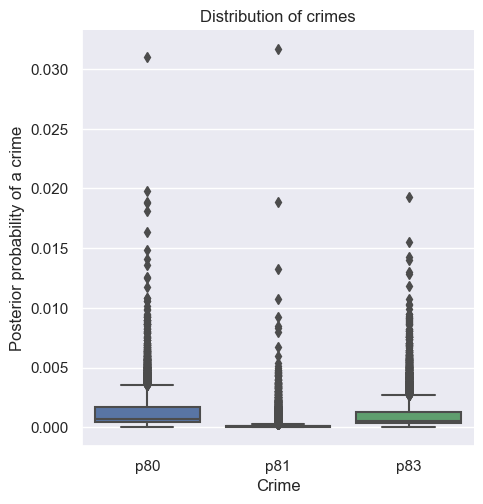

In [11]:
crimim = crimi.melt("OBEC_KOD", var_name="crime", value_name="crime_prob")
g = sns.catplot(data=crimim, x='crime', y='crime_prob', kind="box")
g.set(xlabel="Crime", ylabel="Posterior probability of a crime",
      title="Distribution of crimes");

The data seems to be highly skewed. Only a small proportion of the data gets a high number of crimes.

### Census Data Integrity

In [12]:
census_nrows, census_ncols = census.shape

In [13]:
%%jinja markdown
The census dataset has {{census_nrows}} rows and {{census_ncols}} columns.

The census dataset has 6246 rows and 91 columns.

In [14]:
"There are NaN values" if np.any(
    census.isna().sum() > 0) else "There are no NaN values"

'There are no NaN values'

The data is well prepared and there are no missing values.

#### Columns Data Types

Next we check for any unique identifiers.

In [15]:
"OBEC_KOD is a unique identifier" if census.OBEC_KOD.is_unique else "OBEC_KOD id not a unique identifier"

'OBEC_KOD is a unique identifier'

In [16]:
"OBEC_NAZEV is a unique identifier" if census.OBEC_NAZEV.is_unique else "OBEC_NAZEV is not a unique identifier"

'OBEC_NAZEV is not a unique identifier'

We see that the name of the municipality is not unique. This is true as there indeed are municipalities with the same name in Czech Republic. For example:

In [17]:
pd.value_counts(census.OBEC_NAZEV).sort_values(ascending=False).head()

Nová Ves     14
Němčice       9
Petrovice     9
Slatina       8
Vrbice        7
Name: OBEC_NAZEV, dtype: int64

In [18]:
census.dtypes

deti_0_2021           float64
deti_1_2021           float64
deti_2_2021           float64
deti_3_2021           float64
deti_4_2021           float64
                       ...   
vzdelani_vo_mean      float64
vzdelani_vys_mean     float64
vzdelani_zakl_mean    float64
OBEC_KOD                int64
OBEC_NAZEV             object
Length: 91, dtype: object

``OBEC_KOD`` is a string, ``OBEC_KOD`` is a unique identifier and all other the fields represent the posterior probability of individual subcategories and are floats. The data types, therefore, make sense.

#### Age distribution

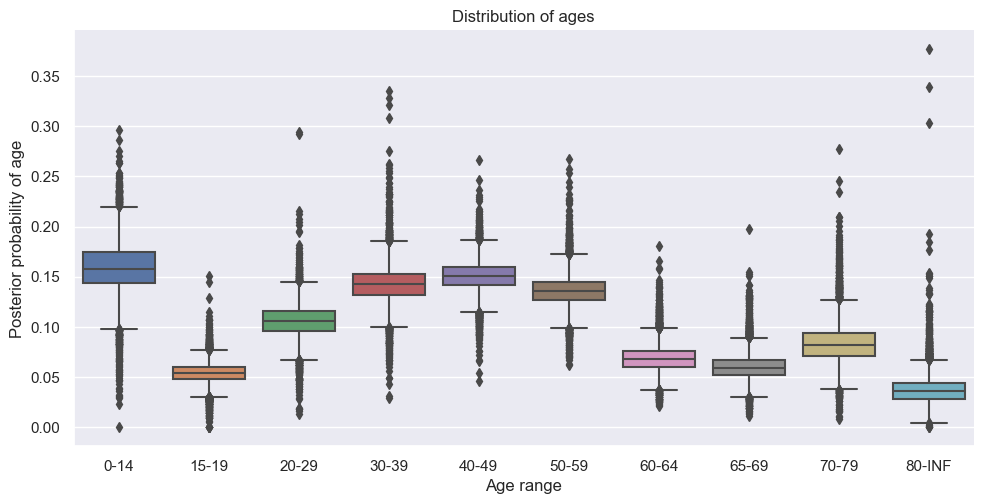

In [19]:
agem = age.drop("OBEC_NAZEV", axis=1).melt("OBEC_KOD", var_name="age_cat",
                                           value_name="age_prob")
g = sns.catplot(data=agem, x="age_cat", y="age_prob", kind='box', aspect=2)
g.set(xlabel="Age range", ylabel="Posterior probability of age",
      title="Distribution of ages");

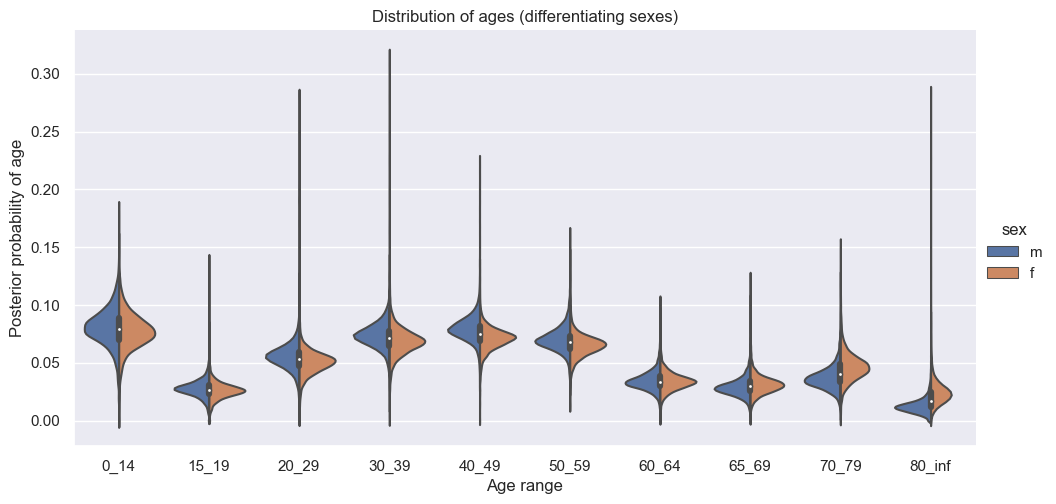

In [20]:
age_men_m = age_men.drop("OBEC_NAZEV", axis=1).melt("OBEC_KOD",
                                                    var_name="age_cat",
                                                    value_name="age_prob")
age_men_m["sex"] = 'm'
age_woman_m = age_women.drop("OBEC_NAZEV", axis=1).melt("OBEC_KOD",
                                                        var_name="age_cat",
                                                        value_name="age_prob")
age_woman_m['sex'] = 'f'
age_sex_m = pd.concat([age_men_m, age_woman_m])
g = sns.catplot(data=age_sex_m, x="age_cat", y="age_prob", hue='sex',
                kind='violin',
                split=True, aspect=2)
g.set(xlabel="Age range", ylabel="Posterior probability of age",
      title="Distribution of ages (differentiating sexes)");

The distribution of ages seems to be appropriate. There is a tendency for women to live longer, which does correspond to reality. Note that the ranges are not evenly spaced, therefore the distribution looks inflated at the first category containing children.

#### Age Relationships

**Questions**:
- Do areas with a lot of children have a higher crime rate? Or perhaps is the crime rate higher? (as parents might be trying to find ways to provide for their children)
- What about teenagers and crime rate? Do teenagers engage in illicit activities?
- Which age group is the most likely to engage in criminal activity?

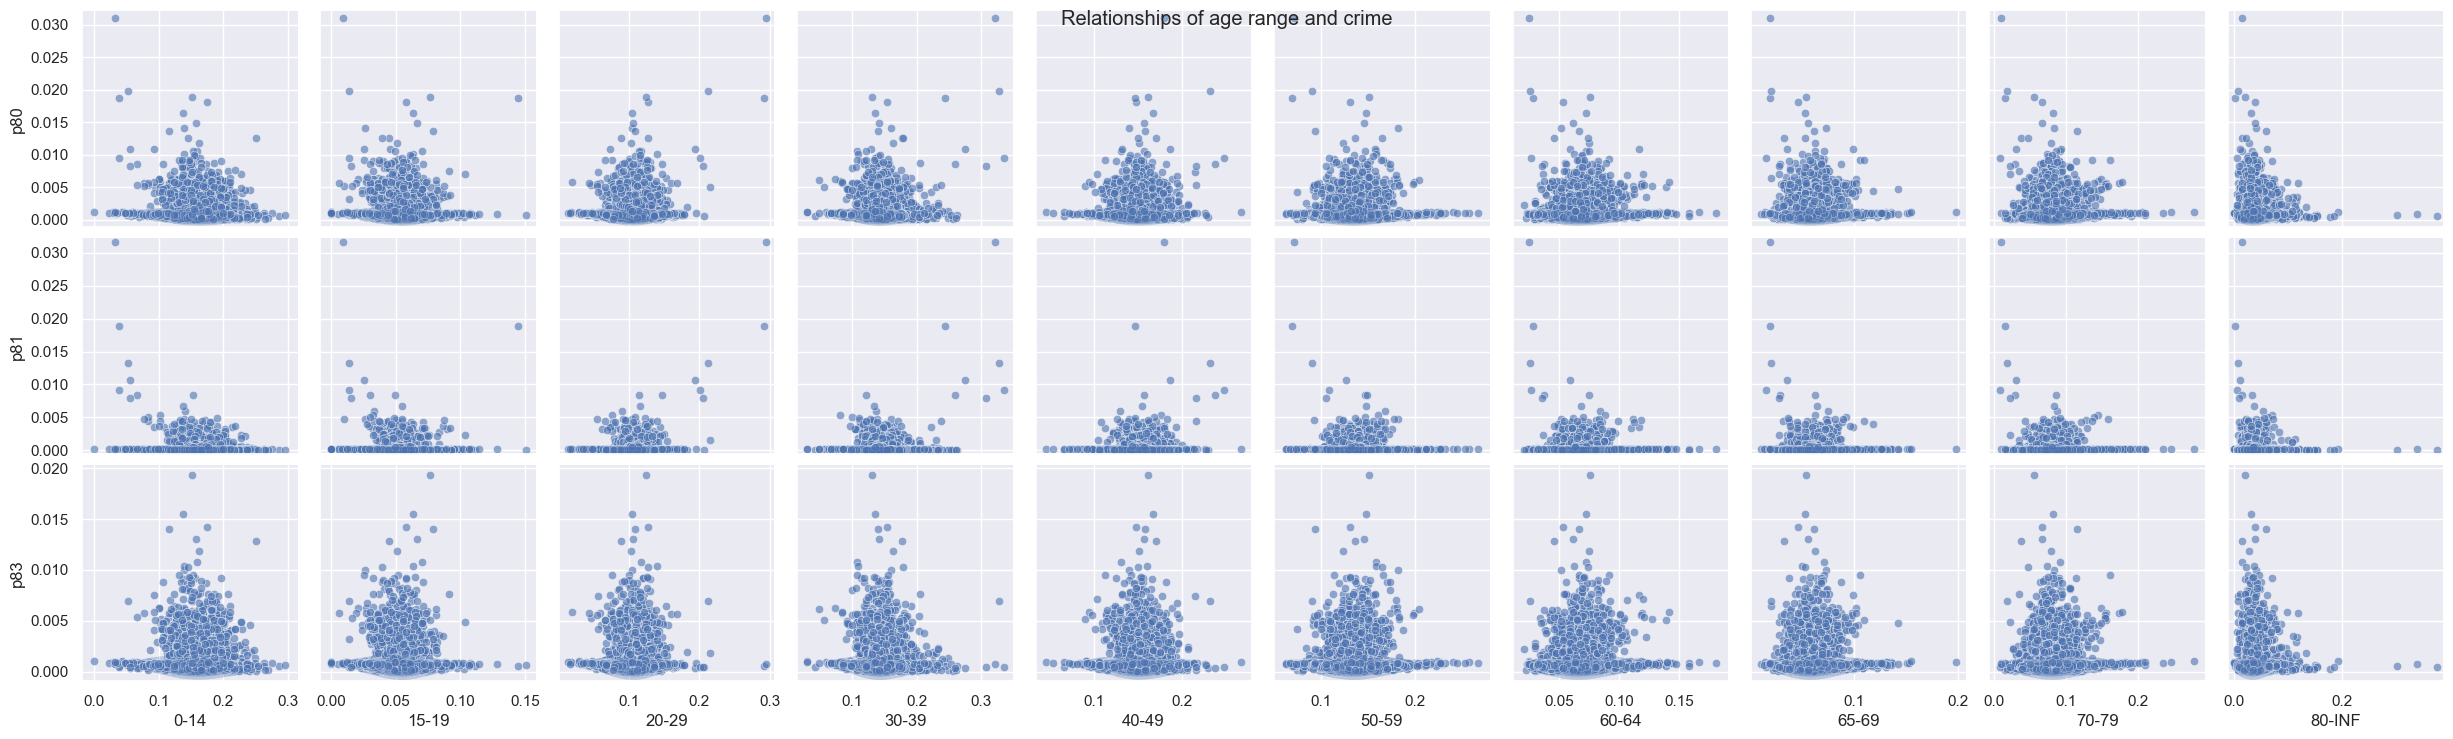

In [21]:
age_crimi_df = age.set_index('OBEC_KOD').join(crimi.set_index('OBEC_KOD')).drop(
    "OBEC_NAZEV", axis=1)
age_groups = list(age.columns.drop(["OBEC_KOD", "OBEC_NAZEV"]))
g = sns.pairplot(data=age_crimi_df, x_vars=age_groups, y_vars=crime_cats,
                 plot_kws=dict(alpha=0.6))
g.map(sns.kdeplot, alpha=0.3)
g.fig.suptitle("Relationships of age range and crime");

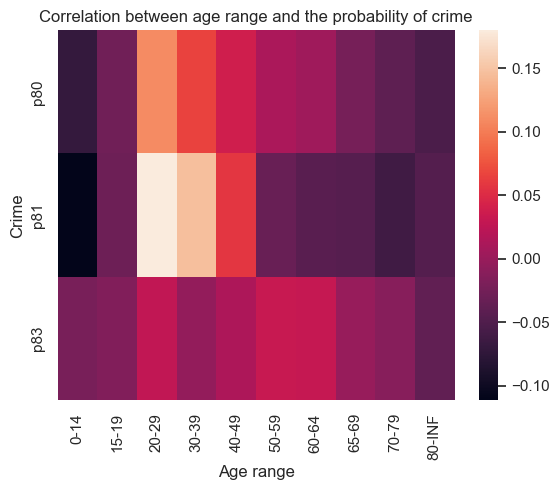

In [22]:
g = sns.heatmap(age_crimi_df.corr().loc[crime_cats][age_groups])
g.set(xlabel="Age range", ylabel="Crime",
      title="Correlation between age range and the probability of crime");

We notice a strong correlation between toxicomania and possession of illicit substances for areas with a high number of people aged 20-40 years. On the other hand areas with a lot of children have negative correlation.

#### Religion Data Distribution

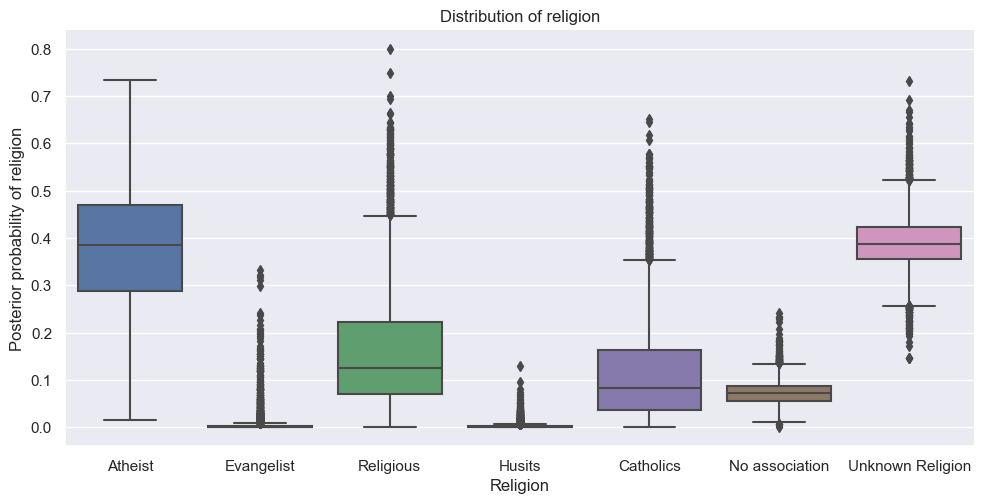

In [23]:
religion_m = religion.drop(["OBEC_NAZEV"], axis=1).melt("OBEC_KOD",
                                                        var_name="religion",
                                                        value_name="prob")
g = sns.catplot(data=religion_m, x='religion', y='prob', kind='box', aspect=2)
g.set(xlabel="Religion", ylabel="Posterior probability of religion",
      title="Distribution of religion");

#### Religion Relationships

**Questions**:
- Are religious ares more or less likely to be criminal?
- Is atheism a predictor of criminality?
- Are there differences in the amount of criminal activity in areas dominated by different religious groups?

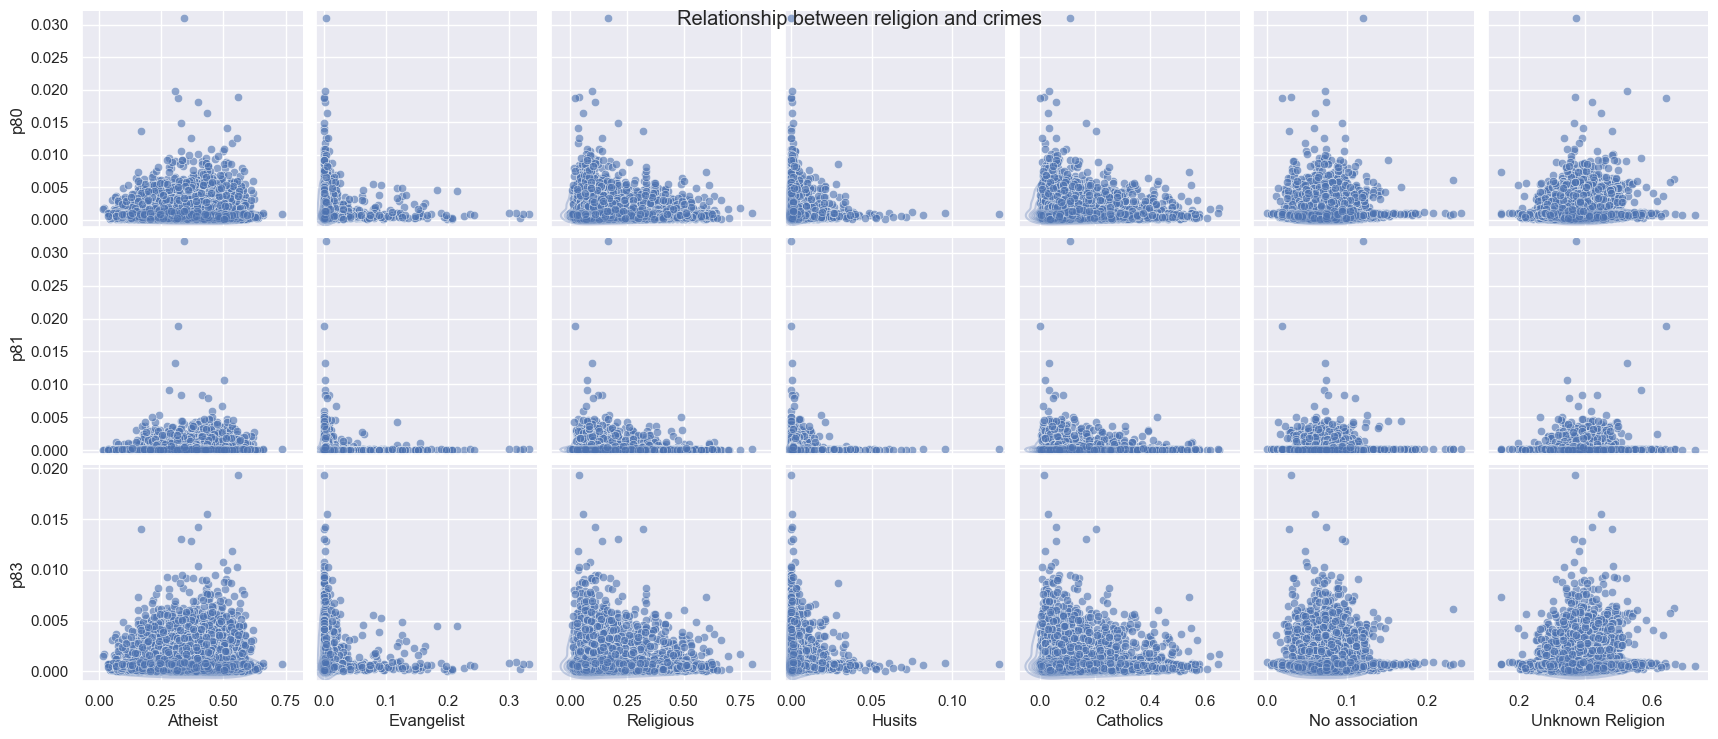

In [24]:
religion_crimi_df = religion.set_index('OBEC_KOD').join(
    crimi.set_index('OBEC_KOD')).drop("OBEC_NAZEV", axis=1)
religion_groups = list(religion.columns.drop(["OBEC_KOD", "OBEC_NAZEV"]))

g = sns.pairplot(data=religion_crimi_df, x_vars=religion_groups,
                 y_vars=crime_cats, plot_kws=dict(alpha=0.6))
g.map(sns.kdeplot, alpha=0.3)
g.fig.suptitle("Relationship between religion and crimes");

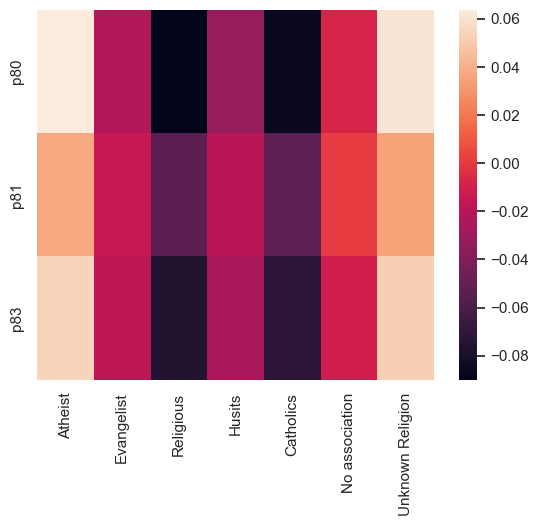

In [25]:
sns.heatmap(religion_crimi_df.corr().loc[crime_cats][religion_groups])
g.set(xlabel="Religion", ylabel="Crime",
      title="Correlation between religion and crime");

There is noticeable difference between mostly religious and mostly atheistic ares. Atheistic areas seem to have more crime than religious areas. There does not seem to be a big difference between different religious groups, however, catholicism seems to have the most positive impact on the area in terms of illicit substance use.

#### Marital Status Data Distribution

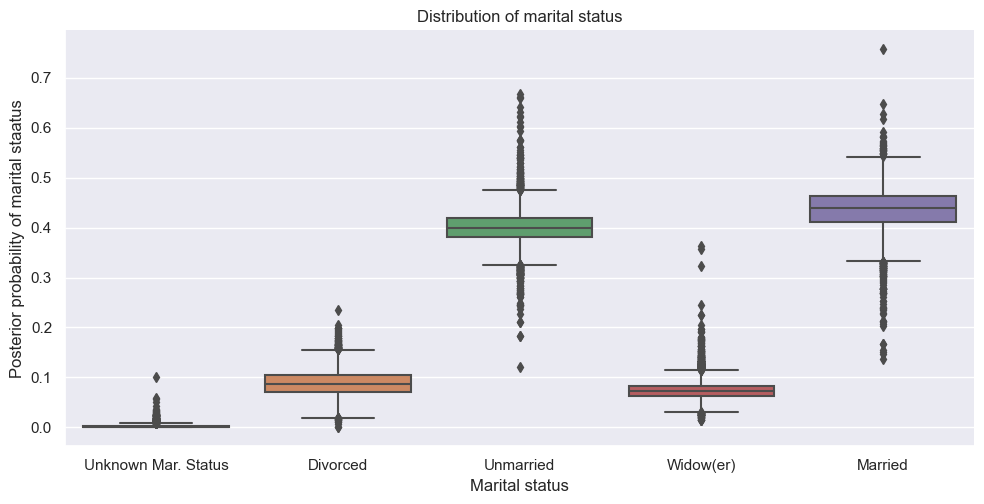

In [26]:
marital_status_m = marital_status.drop(["OBEC_NAZEV"], axis=1).melt("OBEC_KOD",
                                                                    var_name="marital_status",
                                                                    value_name="prob")
g = sns.catplot(data=marital_status_m, x='marital_status', y='prob', kind='box',
                aspect=2)
g.set(xlabel="Marital status",
      ylabel="Posterior probability of marital staatus",
      title="Distribution of marital status");

#### Marital Status Relationships

**Questions**:
- Do areas with a lot of married people (and presumably families) contain a lot of criminal activity?
- Are unmarried people more or less prone to criminality then married people?
- Does divorce lead to criminality?
- Do widow(er)s engage in criminal activities?

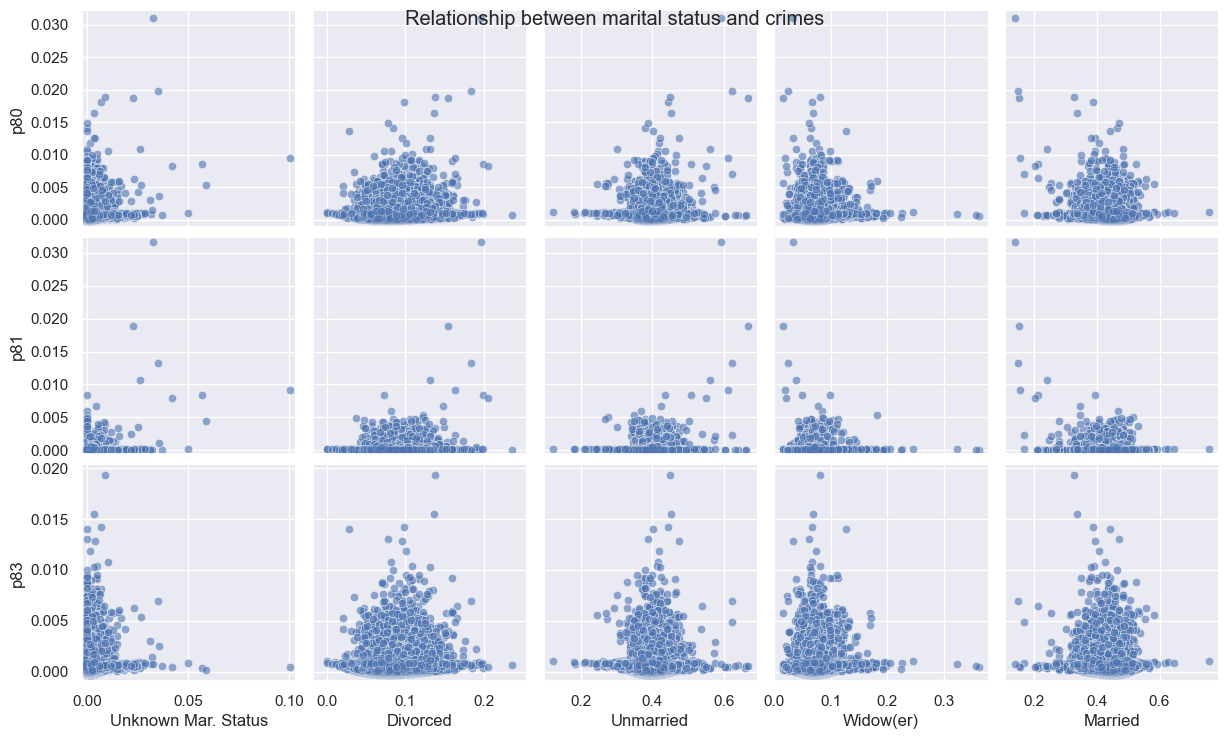

In [27]:
marital_status_crimi_df = marital_status.set_index('OBEC_KOD').join(
    crimi.set_index('OBEC_KOD')).drop("OBEC_NAZEV", axis=1)
marital_status_groups = list(
    marital_status.columns.drop(["OBEC_KOD", "OBEC_NAZEV"]))

g = sns.pairplot(data=marital_status_crimi_df, x_vars=marital_status_groups,
                 y_vars=crime_cats, plot_kws=dict(alpha=0.6))
g.map(sns.kdeplot, alpha=0.3)
g.fig.suptitle("Relationship between marital status and crimes");

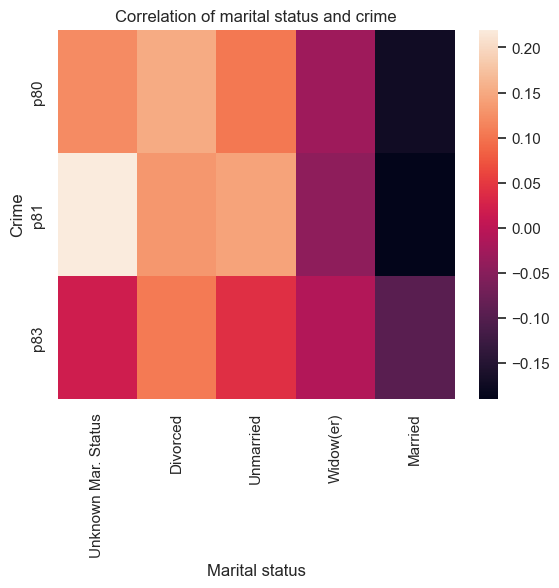

In [28]:
g = sns.heatmap(
    marital_status_crimi_df.corr().loc[crime_cats][marital_status_groups])
g.set(xlabel="Marital status", ylabel="Crime",
      title="Correlation of marital status and crime");

When comparing divorced or unmarried people with married people, there seems to be a tendency for more crime in areas where people live outside marriage. Being divorced seems to slightly increase the inclination for crime compared to being unmarried. Widowed people do not seem to be inclined to crime.

#### Education Data Distribution

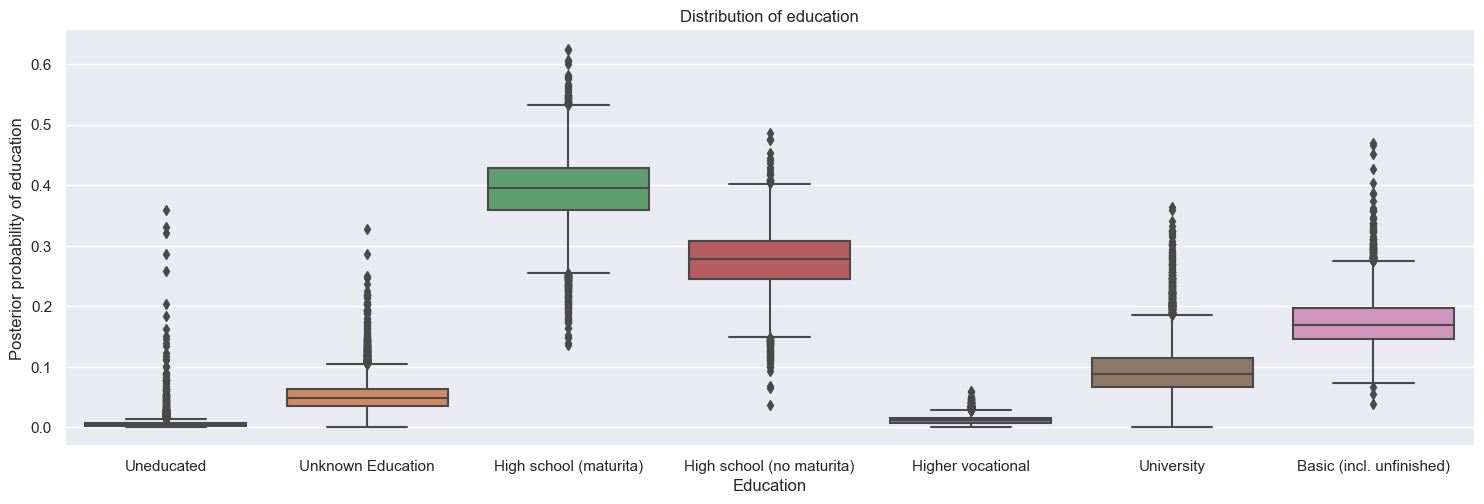

In [29]:
education_m = education.drop(["OBEC_NAZEV"], axis=1).melt("OBEC_KOD",
                                                          var_name="education",
                                                          value_name="prob")
g = sns.catplot(data=education_m, x='education', y='prob', kind='box', aspect=3)
g.set(xlabel="Education", ylabel="Posterior probability of education",
      title="Distribution of education");

#### Education Relationships

**Questions**:
- Does higher amount of educated people imply less criminal activity?
- Are less educated people more prone to criminality?

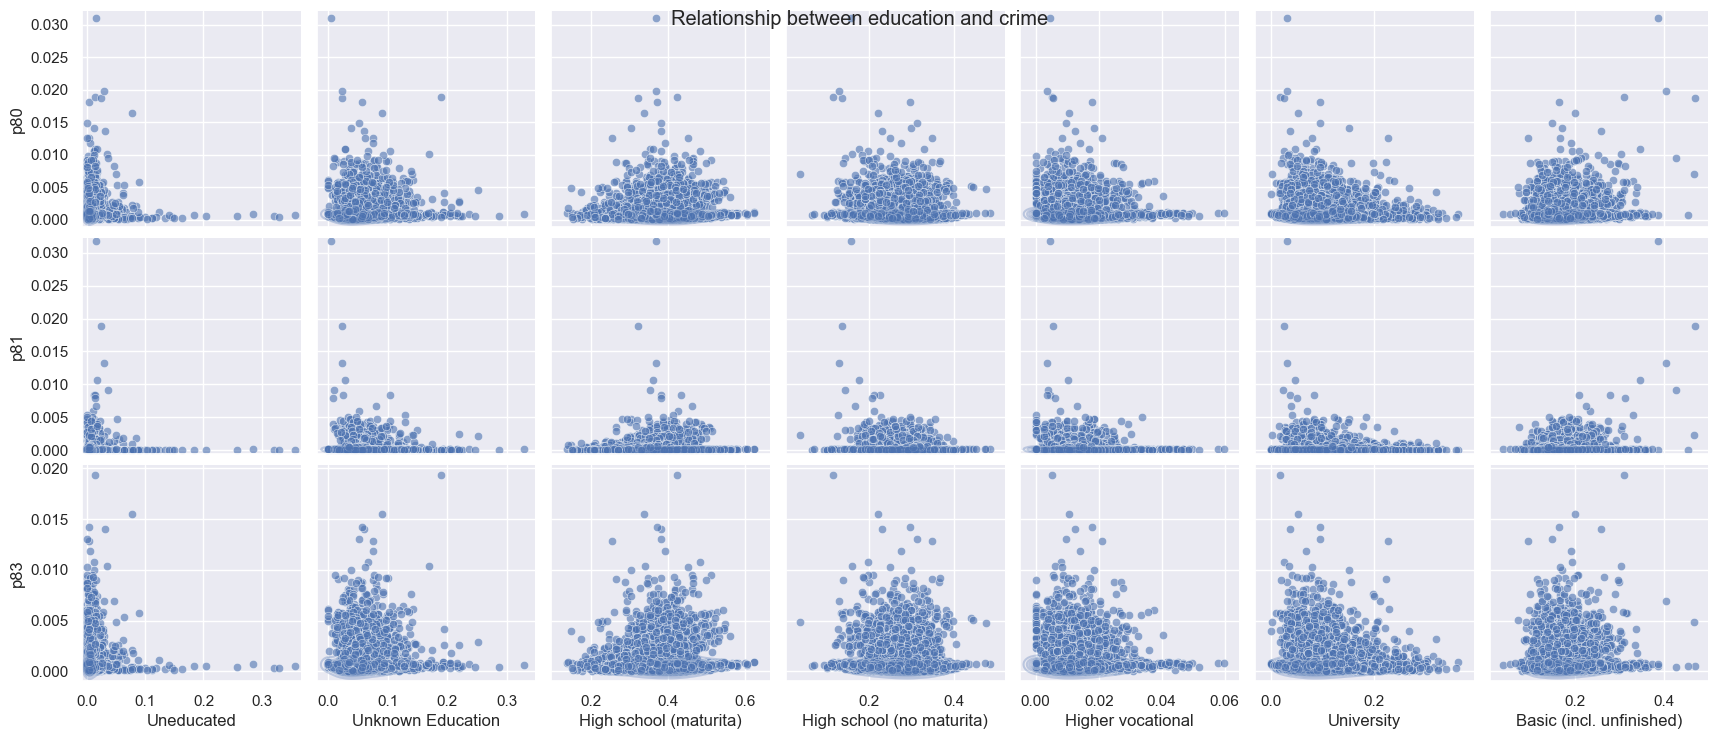

In [30]:
education_crimi_df = education.set_index('OBEC_KOD').join(
    crimi.set_index('OBEC_KOD')).drop("OBEC_NAZEV", axis=1)
education_groups = list(education.columns.drop(["OBEC_KOD", "OBEC_NAZEV"]))

g = sns.pairplot(data=education_crimi_df, x_vars=education_groups,
                 y_vars=crime_cats, plot_kws=dict(alpha=0.6))
g.map(sns.kdeplot, alpha=0.3)
g.fig.suptitle("Relationship between education and crime");

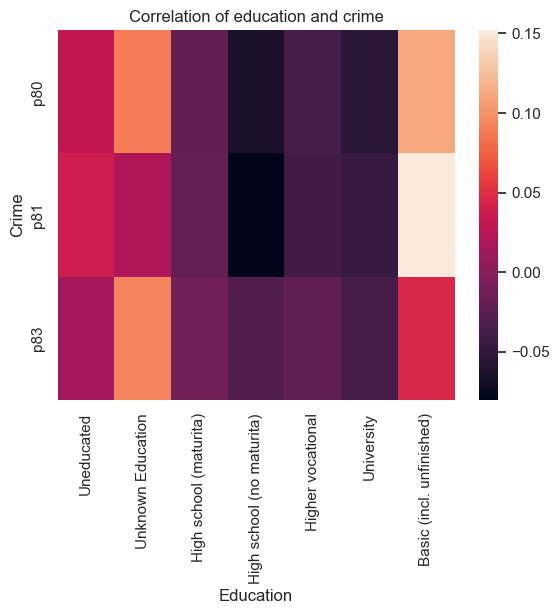

In [31]:
g = sns.heatmap(education_crimi_df.corr().loc[crime_cats][education_groups])
g.set(xlabel="Education", ylabel="Crime",
      title="Correlation of education and crime");

There seems to be a trend that the higher the education achieved, the less crime in the area. Indeed, crime seems to be correlated highest with areas with a lot of people with basic education (or none).

# Summary of exploration

The greatest predictors of criminality in the area seem to be lack of education, high concentration of people aged 20-40 atheism and to a slight degree divorce. On the other hand higher education, religion, marriage, and presence of children seems to have a detrimental effect to amount of criminality concerning illicit substance used present.

---

# Modelling

## Methodology

We will model with a simple linear regression model. We will use the implementation [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) by [``scikit-learn``](https://scikit-learn.org/stable/index.html). This model assumes that the relationship of the dependent variable $y$ is a linear function of independent variables $x_1, x_2, \ldots x_n$

$$
y_i = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n
$$

The main advantage of using linear regression is the ease at which we can interpret the coefficients $\beta_0, \beta_1, \ldots, \beta_n$. The coefficients tell us how much does the dependent variable change, if we increase the associated feature by a unit value. In our setting, where each feature represents the percentual representation of different groups in population, the coefficients represent the change if we increase the amount of people in such community by 1%.

## Goals

Our goal will be to explain the illicit activity in individual regions by the percentual representation of groups in different municipalities. Next, we would like to be able to accurately predict the probability of illicit activities based on these parameters. Such information can be valuable in cases where there is sudden change in demographic, for example due to migration, population aging or increase in education.

In [62]:
from collections import defaultdict

import mlflow

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [40]:
# Initialize mlflow
%set_env MLFLOW_TRACKING_URI=http://127.0.0.1:5000

#mlflow.set_experiment("toxicomania")
#mlflow.sklearn.autolog()

env: MLFLOW_TRACKING_URI=http://127.0.0.1:5000


In [199]:
# Combine all categories into one Data Frame
df = crimi\
    .merge(age, on='OBEC_KOD').drop('OBEC_NAZEV', axis=1)\
    .merge(marital_status, on='OBEC_KOD').drop('OBEC_NAZEV', axis=1)\
    .merge(religion, on='OBEC_KOD').drop('OBEC_NAZEV', axis=1)\
    .merge(education, on='OBEC_KOD').drop('OBEC_NAZEV', axis=1)

# Convert to percentages
df *= 100
df.head()

,OBEC_KOD,p80,p81,p83,0-14,15-19,20-29,30-39,40-49,50-59,...,Catholics,No association,Unknown Religion,Uneducated,Unknown Education,High school (maturita),High school (no maturita),Higher vocational,University,Basic (incl. unfinished)
0,50001100,0.239282,0.001895,0.238008,13.040714,4.658169,10.960629,14.011500,15.169959,14.233904,...,18.970998,10.410747,36.956320,0.405472,3.741281,35.319314,30.278897,1.121299,13.677260,15.945736
1,50002000,0.267708,0.002790,0.266072,14.225941,5.774059,9.330544,13.933054,14.560669,13.682008,...,7.573222,8.033473,36.192469,0.781405,3.346457,39.372744,26.359772,1.270961,6.796003,21.569872
2,50004600,0.076304,0.002114,0.073841,16.247202,5.960564,10.432770,14.115344,14.675949,14.261762,...,14.114617,9.350300,38.669729,0.293493,3.232759,40.153219,29.456559,1.133961,11.322101,14.961266
3,50025900,0.065743,0.056825,0.008560,15.702954,5.554954,11.617245,13.103143,14.973066,14.360713,...,21.790365,11.578522,33.056531,0.525316,3.245943,38.640632,30.831522,1.170205,11.456578,14.636974
4,50029100,0.045782,0.001265,0.044192,15.246636,5.882203,9.446192,12.181139,15.848227,14.914245,...,14.176004,9.224133,33.497005,0.369958,2.983139,27.855510,29.949884,1.110150,23.818980,13.959116


In [76]:
# Create a table of lists of feature names grouped by category
feature_groups = dict([("age", age_groups), ("religion", religion_groups), ("education", education_groups), ("marital_status", marital_status_groups)])
crimes = ["p80", "p81", "p83"] 

# List of all features
all_groups = np.concatenate(list(feature_groups.values()))

In [75]:
# Split the data into test and train set
df_train, df_test = train_test_split(
    df, train_size=0.7, test_size = 0.3, random_state=200
)

## Simple linear model on single category

Firstly, we will study how much we can infer from using just a single category to predict the crimes.

In [208]:
# Try simple linear regression on individual categories
model_simple = defaultdict(dict)
for group in feature_groups:
    for crime in crimes:
        y = df_train[crime]
        X = df_train[feature_groups[group]]
        
        model = LinearRegression()
        
        folds = KFold(n_splits = 5, shuffle = True, random_state=42)
        scores = cross_val_score(model, X, y, scoring='r2', cv=folds)
        
        model.fit(X, y)
        
        y_test = df_test[crime]
        y_pred = model.predict(df_test[feature_groups[group]]) 
        r2 = sklearn.metrics.r2_score(y_test, y_pred)
        
        model_simple[group][crime] = { 'model': model, 'r2_cv': scores, 'r2_test': r2 }


# Print summary
print("SIMPLE LINEAR MODEL - SINGLE CATEGORY")
print()
for group in feature_groups:
    print(f"Category: {group}")
    for crime in crimes:
        print(f"\tCrime {crime}")
        #print('\t|  Intercept: ', model_simple[group][crime]['model'].intercept_)
        #print('\t|  Beta coefficients: ', model_simple[group][crime]['model'].coef_)
        print('\t|  CV scores (R2):', model_simple[group][crime]["r2_cv"])
        print('\t|  CV scores (R2) summary: mean={:0.2}, std={:0.2}'.format(
                np.mean(model_simple[group][crime]["r2_cv"]),
                np.std(model_simple[group][crime]["r2_cv"]))
             )
        
        print('\t|  Test R2: {:0.2}'.format(model_simple[group][crime]["r2_test"]))
        print()
    print()

SIMPLE LINEAR MODEL - SINGLE CATEGORY

Category: age
	Crime p80
	|  CV scores (R2): [-0.04999406  0.02273174 -0.02141844 -0.04901709  0.05238271]
	|  CV scores (R2) summary: mean=-0.0091, std=0.041
	|  Test R2: 0.021

	Crime p81
	|  CV scores (R2): [-0.32704203  0.07285417 -0.09381866 -0.30995276  0.09814999]
	|  CV scores (R2) summary: mean=-0.11, std=0.18
	|  Test R2: 0.0075

	Crime p83
	|  CV scores (R2): [ 0.000139   -0.0041372  -0.0033209  -0.00709681  0.00032628]
	|  CV scores (R2) summary: mean=-0.0028, std=0.0028
	|  Test R2: 0.0019


Category: religion
	Crime p80
	|  CV scores (R2): [ 0.01852007  0.00518549  0.00505544 -0.00261452  0.00579203]
	|  CV scores (R2) summary: mean=0.0064, std=0.0068
	|  Test R2: 0.007

	Crime p81
	|  CV scores (R2): [-0.00078006  0.00236393 -0.00743734 -0.00698996 -0.00017798]
	|  CV scores (R2) summary: mean=-0.0026, std=0.0039
	|  Test R2: -0.0013

	Crime p83
	|  CV scores (R2): [ 0.01473952  0.00165325  0.0056851  -0.00368153  0.00720084]
	|  CV

Considering, for example, just the education category, we immediately notice that the performance of our model given the $R^2$ metric is very poor. It is very close to 0 (or even _negative_) in almost all cases both on cross validation as well on the test set. This tells us that the variability in the data cannot be simply explained by our model and any inference would be meaningless.

Next, we will try to improve the performance.

## Simple linear model on all category

To remedy the shortcomings of the previous model, we might want to try to use all the features in a single model in hope that together, they will produce better results.
For example. something that cannot be easily explained by only category, might be explained better having considered a combination of categories.

Again, we will use a simple linear model.

In [211]:
# Try using all feature groups
model_all = dict()
for crime in crimes:
        X = df_train[all_groups]
        y = df_train[crime]
        
        model = LinearRegression()
        
        folds = KFold(n_splits = 5, shuffle = True, random_state=42)
        scores = cross_val_score(model, X, y, scoring='r2', cv=folds)
        
        model.fit(X, y)
        
        y_test = df_test[crime]
        y_pred = model.predict(df_test[all_groups])
        r2 = sklearn.metrics.r2_score(y_test, y_pred)
        
        model_all[crime] = { 'model': model, 'r2_cv': scores, 'r2_test': r2}

# Print summary
print("SIMPLE LINEAR MODEL - ALL CATEGORIES")
print()
for crime in crimes:
    print(f"\tCrime {crime}")
    print('\t|  CV scores (R2):', model_all[crime]['r2_cv'])
    print('\t|  CV scores (R2) summary: mean={:0.2}, std={:0.2}'.format(
            np.mean(model_all[crime]['r2_cv']),
            np.std(model_all[crime]['r2_cv']))
         )

    print('\t|  Test R2: {:0.2}'.format(model_all[crime]['r2_test']))
    print()

SIMPLE LINEAR MODEL - ALL CATEGORIES

	Crime p80
	|  CV scores (R2): [-0.03447935  0.05150047 -0.00985993 -0.00982619  0.11323432]
	|  CV scores (R2) summary: mean=0.022, std=0.054
	|  Test R2: 0.045

	Crime p81
	|  CV scores (R2): [-0.31606635  0.15876839 -0.10827576 -0.2725739   0.17454528]
	|  CV scores (R2) summary: mean=-0.073, std=0.21
	|  Test R2: 0.056

	Crime p83
	|  CV scores (R2): [ 0.0142399  -0.00351188  0.00209899  0.00727761  0.01069009]
	|  CV scores (R2) summary: mean=0.0062, std=0.0063
	|  Test R2: 0.0074



This indeed does increase our $R^2$ on average by some. However it is still well below 10% in all cases.

Maybe simple linear relationships are not enough the explain the variability in our data. Next we will try to introduce some nonlineariy.

## Feature engineering

Another strategy we might want to try to employ is feature engineering. We will use polynomial features of degree 2, meaning that for every pair of input features, we will create a feature that is their product. With these new features we will then be able to model how much does the crime depend on some pair of features. In this way, we will essentially be fitting a polynomial of maximal degree 2 to the data.

We will also use ``Lasso`` regression, which is linear regression regularized with the $\ell_1$-norm. This will result in an approximation of a linear model with the smallest possible support (i.e. choosing only the most important features). We use the default hyperparameters.

In [202]:
# Use polynomial features of degree 2 and Lasso regression
model_poly = dict()
for crime in crimes:
        X = df_train[all_groups]
        y = df_train[crime]
        
        model = Pipeline([
            ("poly", PolynomialFeatures(degree=2)),
            ("estimator", Lasso()),
        ])
        
        folds = KFold(n_splits = 5, shuffle = True, random_state=42)
        scores = cross_val_score(model, X, y, scoring='r2', cv=folds)
        
        model.fit(X, y)
        
        model_poly[crime] = { 'model': model, 'scores': scores }

# Print summary
print("LINEAR MODEL - FEATURE ENGINEERING + LASSO")
print()
for crime in crimes:
    print(f"Crime {crime}")
    print('\t|  CV scores (R2):', model_poly[crime]["scores"])
    print('\t|  CV scores (R2) summary: mean={:0.2}, std={:0.2}'.format(
            np.mean(model_poly[crime]["scores"]),
            np.std(model_poly[crime]["scores"]))
         )

    y_test = df_test[crime]
    y_pred = model_poly[crime]['model'].predict(df_test[all_groups])

    r2 = sklearn.metrics.r2_score(y_test, y_pred)
    print('\t|  Test R2: {:0.2}'.format(r2))
    print()


Crime p80
	|  CV scores (R2): [-0.0099257   0.05060674  0.01723994  0.01017389  0.03363635]
	|  CV scores (R2) summary: mean=0.02, std=0.021
	|  Test R2: 0.056

Crime p81
	|  CV scores (R2): [-0.12898911  0.14006701  0.03510089 -0.05290714  0.01743213]
	|  CV scores (R2) summary: mean=0.0021, std=0.09
	|  Test R2: 0.12

Crime p83
	|  CV scores (R2): [0.00787744 0.0072676  0.0100781  0.00722241 0.0122439 ]
	|  CV scores (R2) summary: mean=0.0089, std=0.002
	|  Test R2: 0.0093



This does again bring about some improvements and we were even able to get the score for crime ``p81`` above ``0.1``. Which is still nothing to write home about.

## Why does our model fail?

We will now try to investigate, why does our model performed so poorly. Concretely, why is the $R^2$ score so low. The definition of $R^2$ is as follows:

$$
R^2 = 1 - \frac{\sum_{i = 1}^n {(y_i - \hat{y_i})}^2}{\sum_{i = 1}^n {(y_i - \overline{y_i})}^2}
$$
where $y$ is the true value we are trying to predict, $\overline{y}$ is its mean and $\hat{y}$ is our prediction.

As we can see, the $R^2$ can be arbitrarily small, given our model is bad enough (as we have seen). We will now plot the dependence of $y$ and $\hat{y}$ on our test set using the last model.

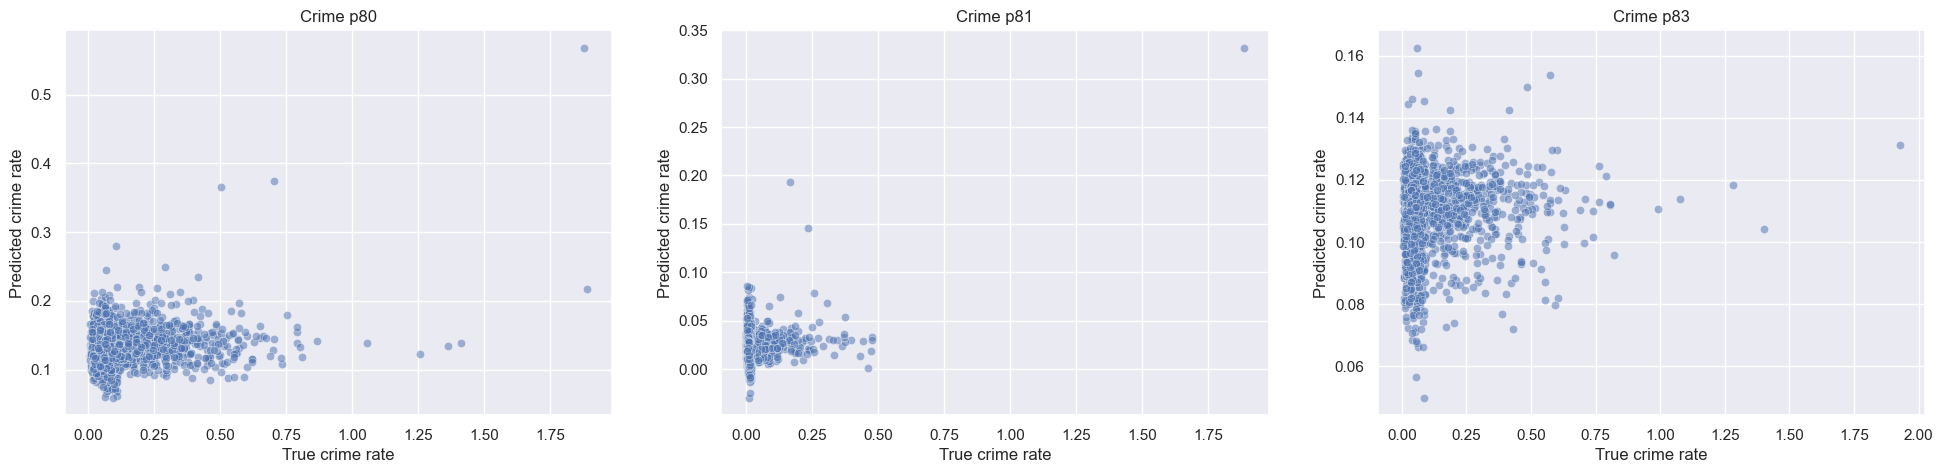

In [230]:
fig, axes = plt.subplots(1, 3, figsize=(24,5))

for ax_no, crime in enumerate(crimes):
    ax = axes[ax_no]
    
    ax.set_title(f'Crime {crime}')
    ax.set_xlabel('True crime rate')
    ax.set_ylabel('Predicted crime rate')
    
    y_test = df_test[crime]
    y_pred = model_poly[crime]['model'].predict(df_test[all_groups])
    g = sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, ax=ax)
    


In an ideal model we would see the points distributed along identity. This is not the case. One notable feature our plot is that the prediction seems to be shifted up, meaning that our model predicts that there is _more_ crime in a given area then there is in reality. One explanation of this is that linear regression is sensitive towards outliers. If we look at the exploratory part of the analysis, we have noted that the distribution of crime probability is very skewed towards 0 with a lot of outliers. It might be the case that it was exactly these outliers that shift our prediction this way.

# Results

Our simple linear model failed to give an adequate performance on the prediction of crime in an area in any category. The inference of the influence of the demographic make up was, therefore, rendered meaningless. It was noted that this might have been caused by the uneven distribution of crimes in the area. One possible avenue of work is to explore whether there exist any relationship in this uneven distribution and use this knowledge in subsequent modelling. Another possibility is to use a more sophisticated model for tabular data (such as decision tree).